# Explanatory Data Analysis For Machine Learning - Assignment

## Mauro Hauptmann

##  Brief description of the data set and a summary of its attributes

We will be using the Titatic Dataset for this assignment. The Titanic dataset offers insights on the kind of passengers that were on board the famous ship that sank in the North Atlantic during its maiden voyage in 1912 after hitting an iceberg. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died.

The dataset offers insights on the passengers - such as the class (First Class, 2nd or 3rd), age, sex, number of siblings aboard, number of parents aboard, how they paid for their tickets, port of embarcation etc - and if they survived or not.  The dataset offers interesting insights on the probability of survival of the passenger based on each of these attributes.

**Dataset attributes:**

> 1. PassengerId - passenger number
> 2. Survived - an indication if the passenger survived or not
> 3. Pclass - the class the passenger belongs to (1,2 or 3)
> 4. Name - passenger name
> 5. Sex - male or female
> 6. Age - the ager of the passenger
> 7. SibSp - how many siblings were included in the group for this passenger
> 8. Parch - how many parents were included in the group for this passenger
> 9. Ticket - ticket number
> 10. Fare - how much they paid for the ticket
> 11. Cabin - the cabin number
> 12. Embarqued - port passenger embarked


## Initial plan for data exploration

The dataset was downloaded from github:
https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5#file-titanic-csv
The data is provided as a comma delimited file.  We read the data into a dataframe and start our exploratory data analysis.

There are 891 observations and 12 attributes.


In [8]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()


Populating the interactive namespace from numpy and matplotlib


In [9]:
ds = pd.read_csv('data/titanic.csv')

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
ds.shape

(891, 12)

In [12]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial plan for data exploration

After loading the data and inspecting the data we decide to focus on the attributes such as Pclass (class of passenger), Sex and Age to see how these factors had an influence on the survival of the passenger.



In [13]:
ds.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
ds.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

The column "Pclass" has 3 values.  This may be a candidate for using one hot encoding.

## Actions taken for data cleaning and feature engineering

Create a binary column called "is_male" based on the "Sex" column. Set it initially to 0 and then assign a 1 to it if the sex is Male:

In [15]:
ds['is_male'] = 0
ds.loc[ds['Sex'] == 'male', 'is_male'] = 1

The column Pclass is a good candidate for one hot encoding.  That way we will be able to classify the survival for each of the classes (1, 2 and 3):

In [16]:
ds_pclass = pd.get_dummies(ds.Pclass, prefix='Pclass')
ds = pd.concat([ds,ds_pclass], axis=1)
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


Next we examine the age attribute.  It may be interesting to explore how the age bracket where passengers were more likely to survive.

In [17]:
ds.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
print('Records with null values for Age: ' + str(ds.Age.isnull().sum()))

Records with null values for Age: 177


In [19]:
ds.loc[ds.Age.isnull(), 'Age'] = ds.Age.mean()

There are 177 records where we don't have information about the age of the passenger.  The oldest passenger in the ship was 80 years old and the yougest was less than one year old.  The average age of the a passenger was 29 years old.
We set the column values for age to be the average for for age (27 years old).

In [20]:
ds.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:

print('Records with null values for Embarked: ' + str(ds.Embarked.isnull().sum()))

Records with null values for Embarked: 2


## Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

Are passangers in first class more likely to have survived the disaster?

Are passangers in third class more likely to have died?

Are passangers more likely to survive if they are male?





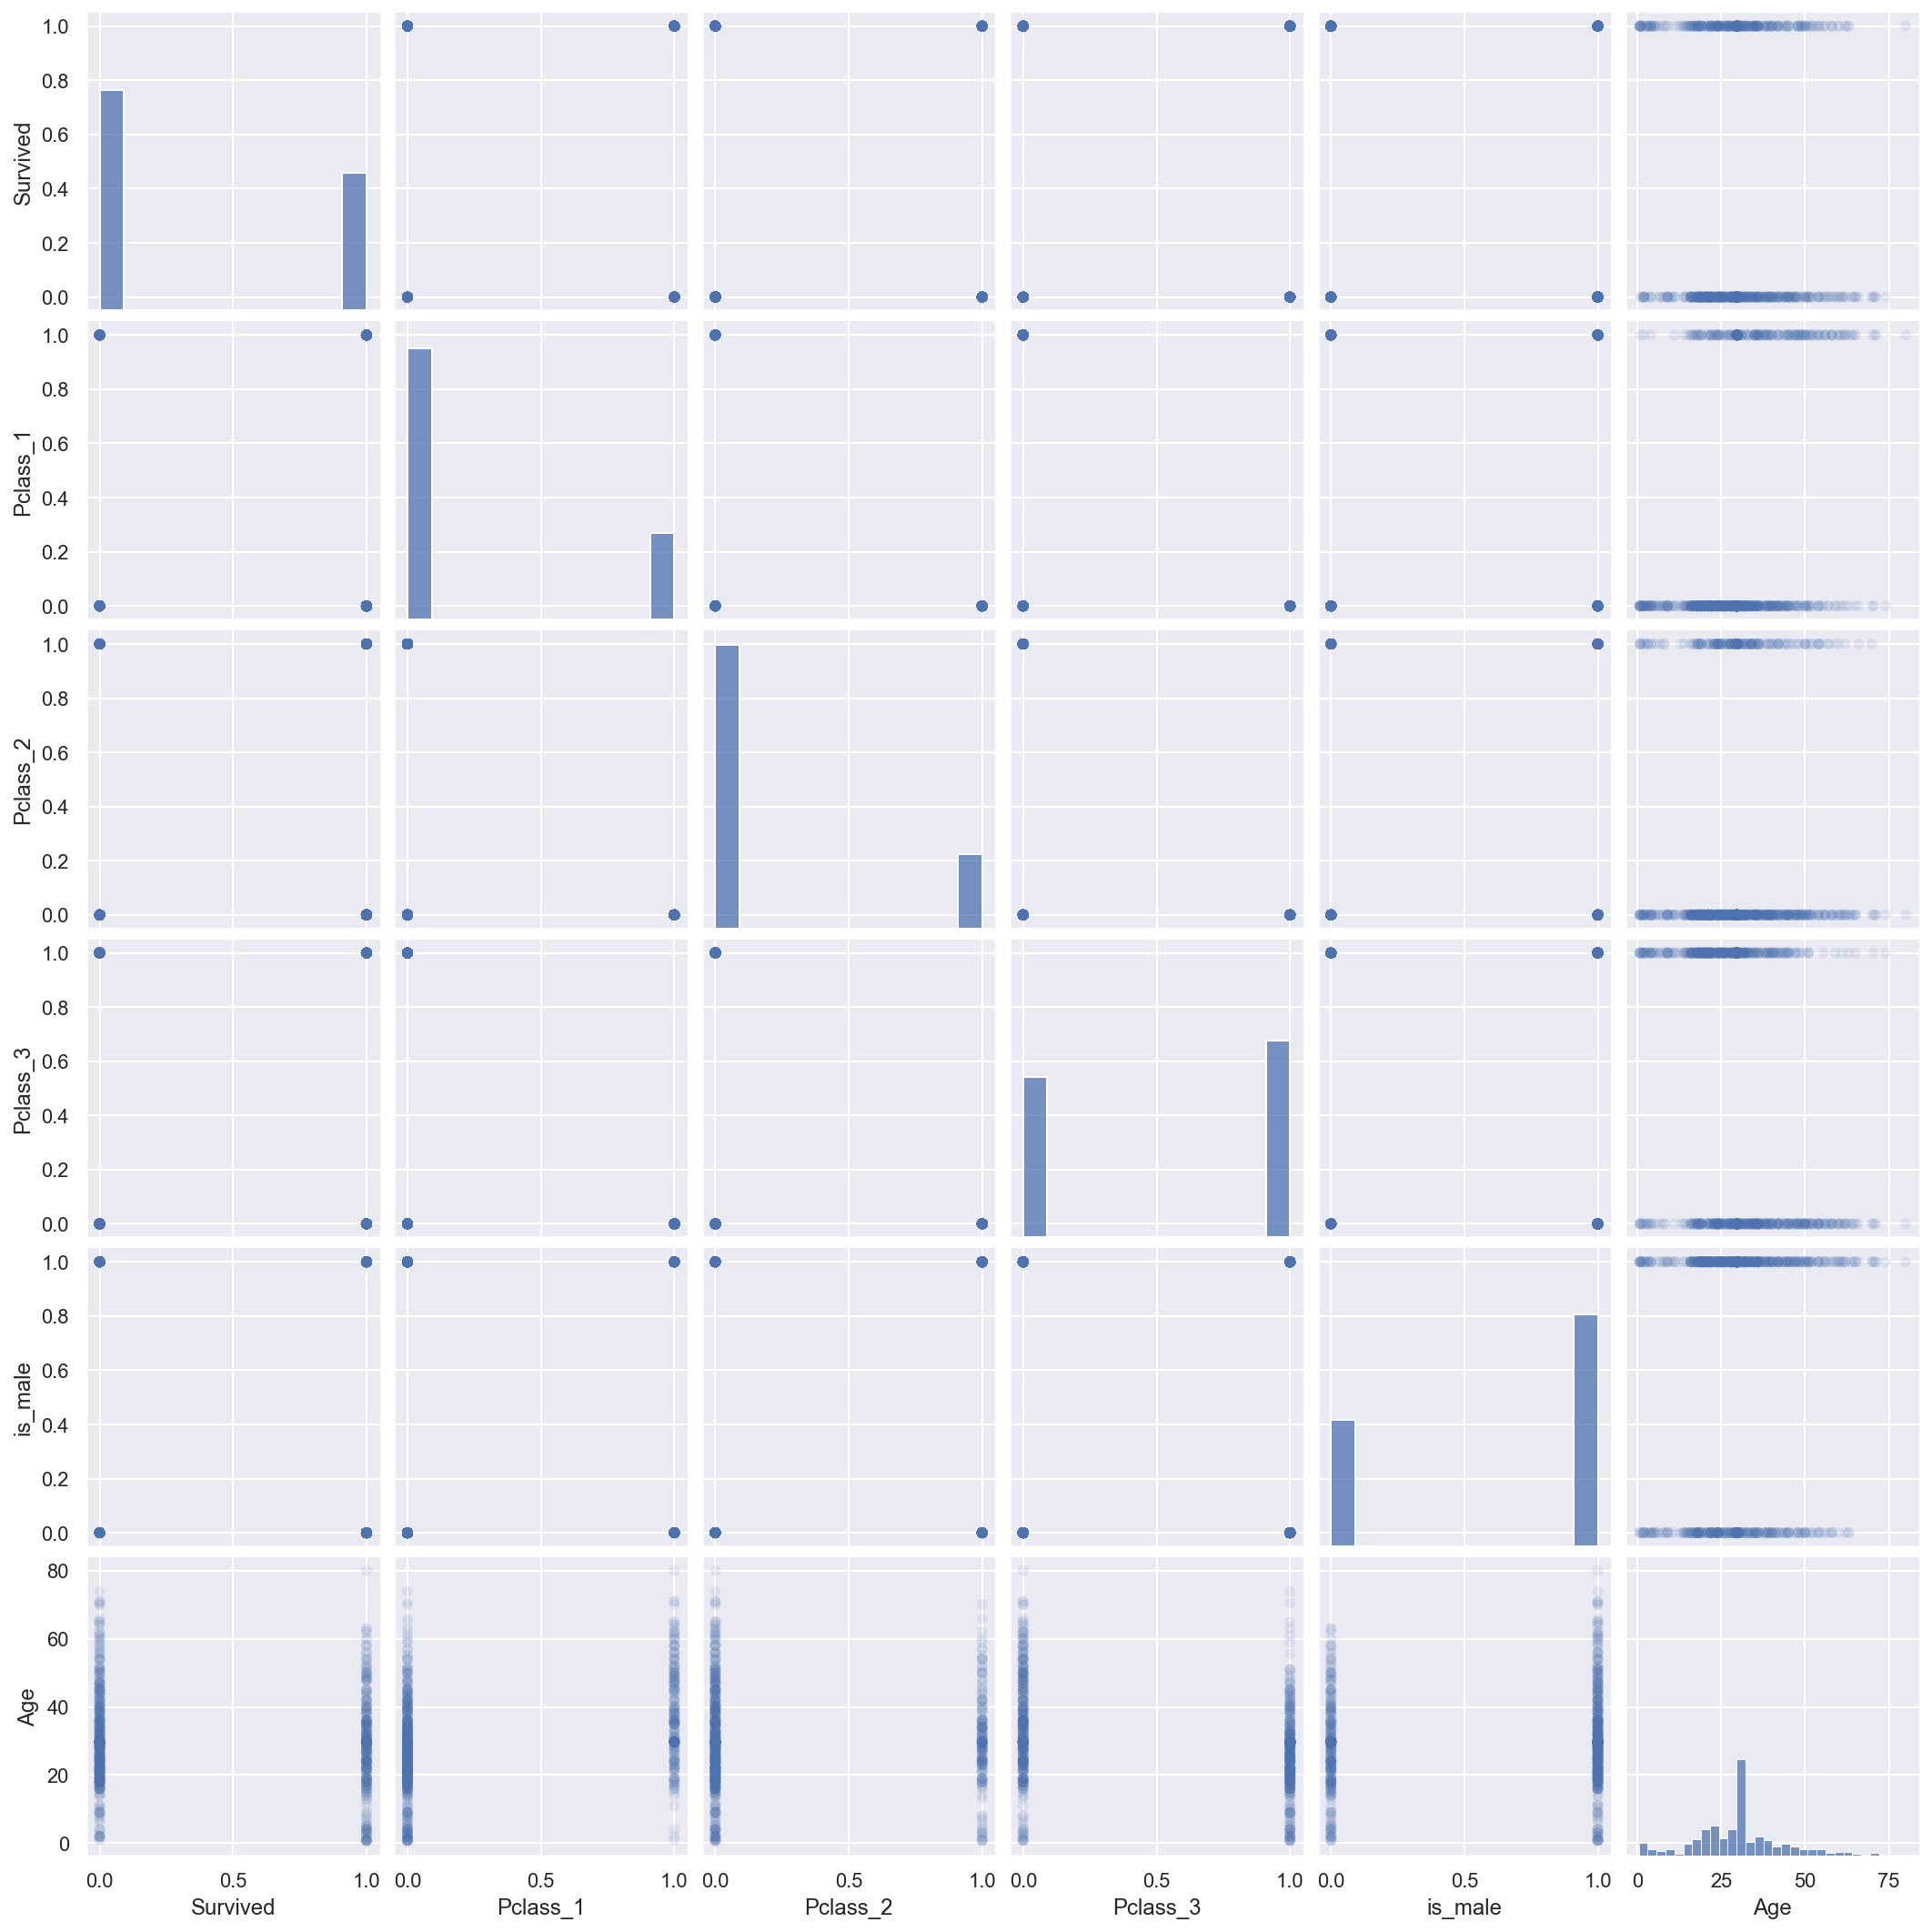

In [22]:
ds_new = ds[['Survived','Pclass_1','Pclass_2','Pclass_3','is_male','Age']]

sns.pairplot(ds_new, plot_kws=dict(alpha=.1, edgecolor='none'))

The pairplot shows the relationships between the vairables. One can see that there were more males that survived and that the first class also included more passangers that survived.

In [23]:
ds_new.groupby(['Survived', 'Pclass_1']).size()

Survived  Pclass_1
0         0           469
          1            80
1         0           206
          1           136
dtype: int64

In [24]:
ds_new.groupby(['Survived', 'Pclass_2']).size()

Survived  Pclass_2
0         0           452
          1            97
1         0           255
          1            87
dtype: int64

In [25]:
ds_new.groupby(['Survived', 'is_male']).size()

Survived  is_male
0         0           81
          1          468
1         0          233
          1          109
dtype: int64

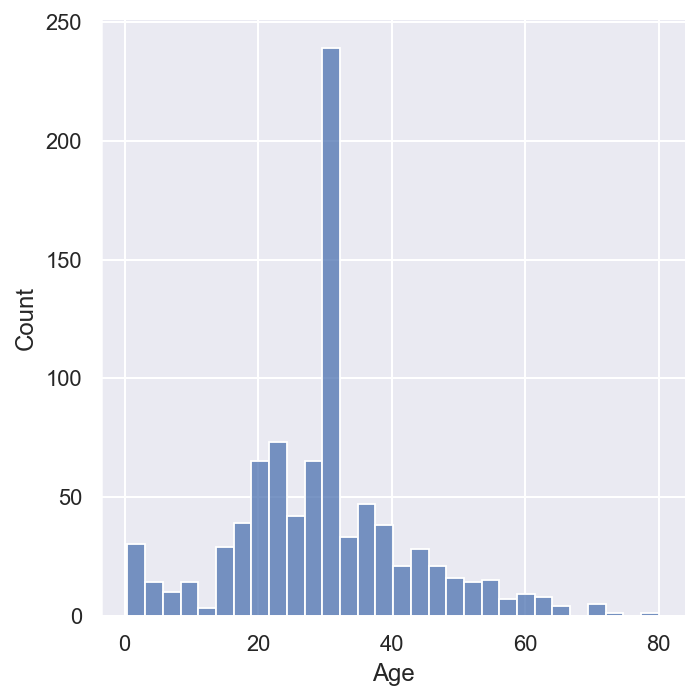

In [26]:
sns.displot(ds_new, x="Age")

The age histogram shows the age distribution of the passengers.  Most of the passengers were between the ages of 20 and 40 years old.

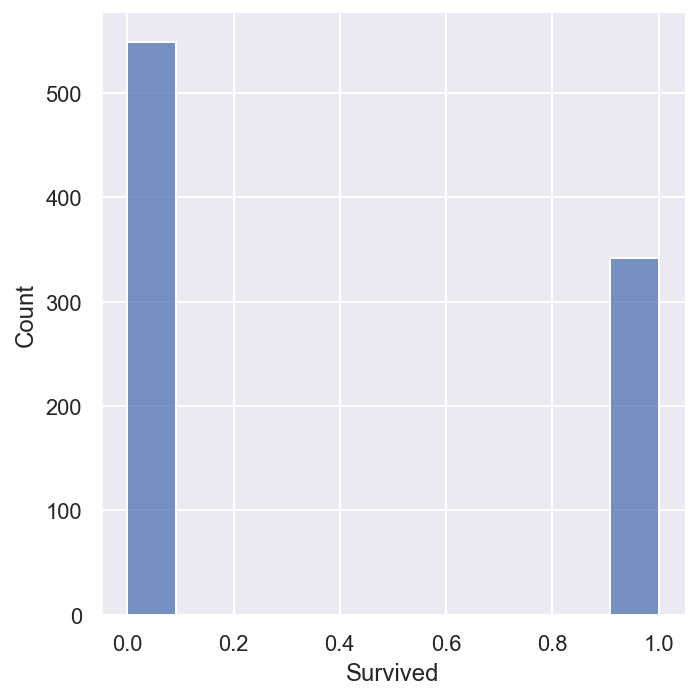

In [27]:
sns.displot(ds_new, x="Survived")

It looks like our hypothesis that you are more likely to have survived the accident if you were in first class may be true. There were 136 passangers that survived the accident that were in first class.  There were 371 passangers in 3rd class that did not survive.
There are 109 passangers that survived and were male.  468 survived and were female.

## Formulating at least 3 hypothesis about this data

> 1. Passangers in first class more likely to have survived the disaster.

> 2. Passangers in third class more likely to have died.

> 3. Passangers more likely to survive if they are male.

## Conducting a formal significance test for one of the hypotheses and discuss the results 

We will test the null hypotheses that Passanges are more likely to die if they were in 3rd class

In [28]:
survived_pclass3 = ds_new['Survived'].loc[ds_new.Pclass_3 == 1].sum()

print('Number of passengers in third class that survived: ' + str(survived_pclass3))

Number of passengers in third class that survived: 119


In [29]:
total_pclass3 = ds_new['Pclass_3'].loc[ds_new.Pclass_3 == 1].sum()

print('Number of passengers in third class: ' + str(total_pclass3))

Number of passengers in third class: 491


In [30]:
percent_survived = (survived_pclass3/total_pclass3)*100
print ('Percent survived: ', str(percent_survived))

Percent survived:  24.236252545824847


In [31]:
from scipy.stats import binom
prob = binom.cdf(percent_survived, 100, 0.50)

print(str(round(prob*100, 1))+"%")

0.0%


Therefore there is a 0 percent probability that only 24% of the passengers in 3rd class would survive if they would be as likely to survive in other classes.

## Suggestions for next steps in analyzing this data

Further analysis include survival by age group and port of entry. Are younger passengers more likely to survive?

## A paragraph that summarizes the quality of this data set and a request for additional data if needed

This dataset is a classic dataset and it is excellent for learning probabilities and how different groups can have different outcomes based on different characteristics.

